In [6]:
#pip install yfinance

In [7]:
import yfinance as yf

In [8]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

In [9]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [10]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-04-06,26.638596,26.720234,26.281522,26.413037,26488525
2015-04-07,26.651247,26.932639,26.600627,26.703854,26057345
2015-04-08,26.879042,26.990209,26.718744,26.718744,23570536
2015-04-09,26.837852,26.895918,26.575321,26.850258,31157308
2015-04-10,26.799637,26.912788,26.665641,26.912788,28189181


In [11]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,86.304164,87.188714,85.394676,86.255951,3.028250e+07
std,46.143514,46.658314,45.650828,46.132511,1.525300e+07
min,25.719679,26.013488,25.637569,25.852549,6.809800e+06
25%,48.412696,48.739770,48.060236,48.437826,2.090300e+07
50%,69.360229,70.275640,68.578978,69.244025,2.659840e+07
75%,125.866089,126.911512,124.619674,125.871812,3.491035e+07
max,207.473633,208.462496,204.027547,204.267279,2.232980e+08


In [12]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-04-06 to 2025-04-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2516 non-null   float64
 1   (High, GOOG)    2516 non-null   float64
 2   (Low, GOOG)     2516 non-null   float64
 3   (Open, GOOG)    2516 non-null   float64
 4   (Volume, GOOG)  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [13]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of Google data')

<Figure size 1500x500 with 0 Axes>

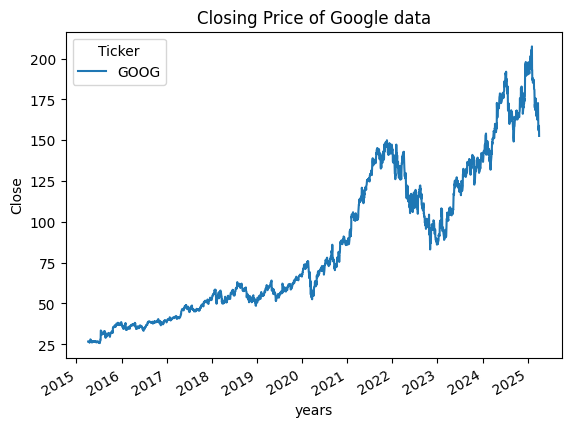

In [15]:
plt.figure(figsize=(15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing Price of Google data")

In [16]:
def plotgraph(figsize, values, colname):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel(colname)
    plt.title(f"{colname} of Google data")

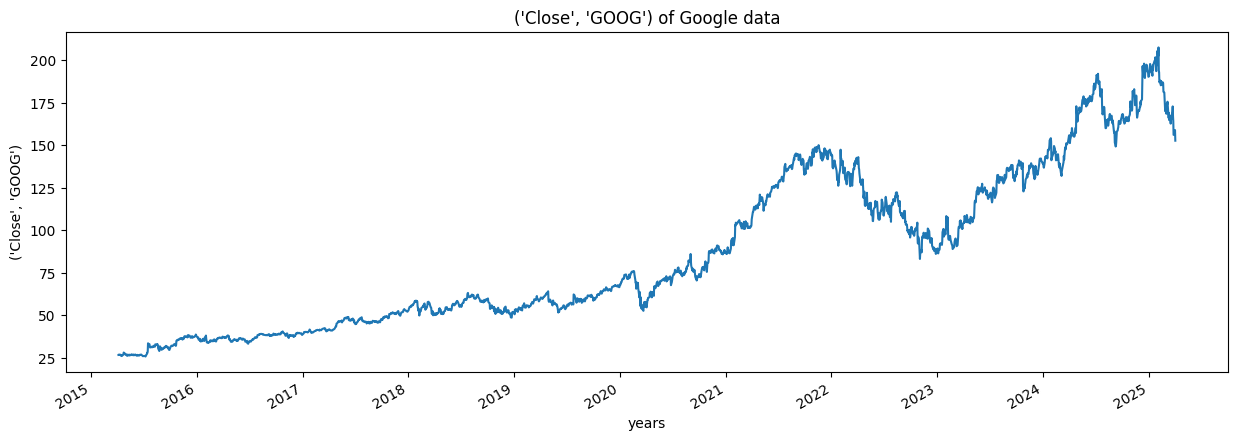

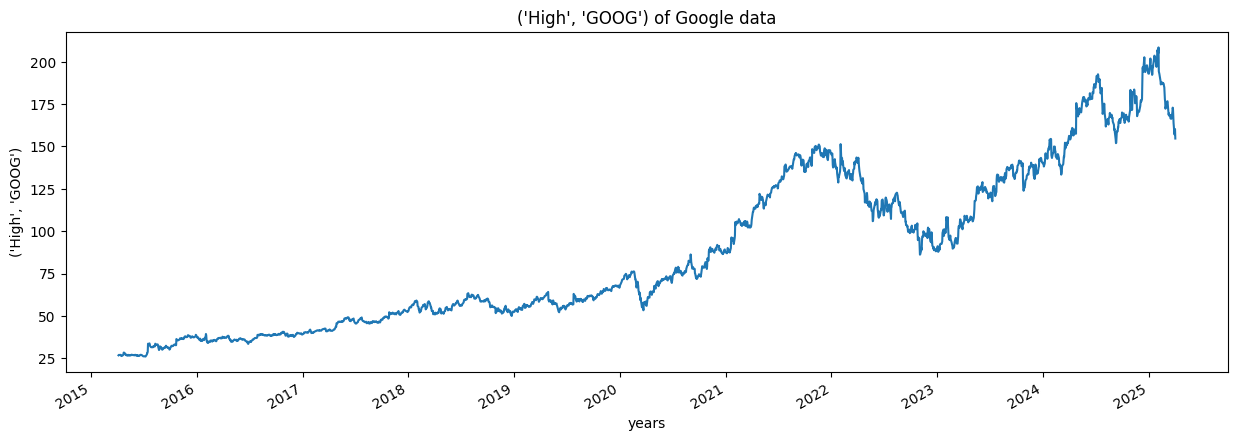

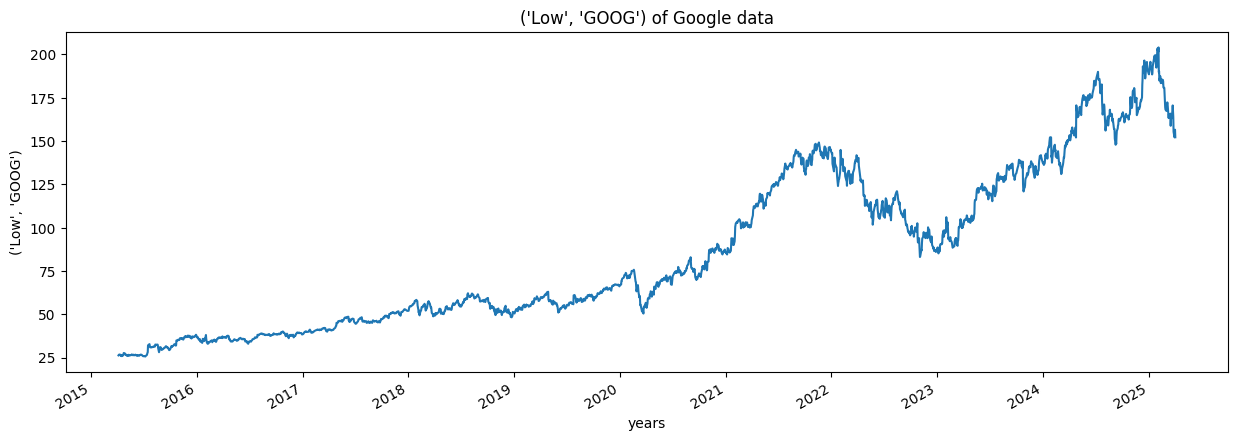

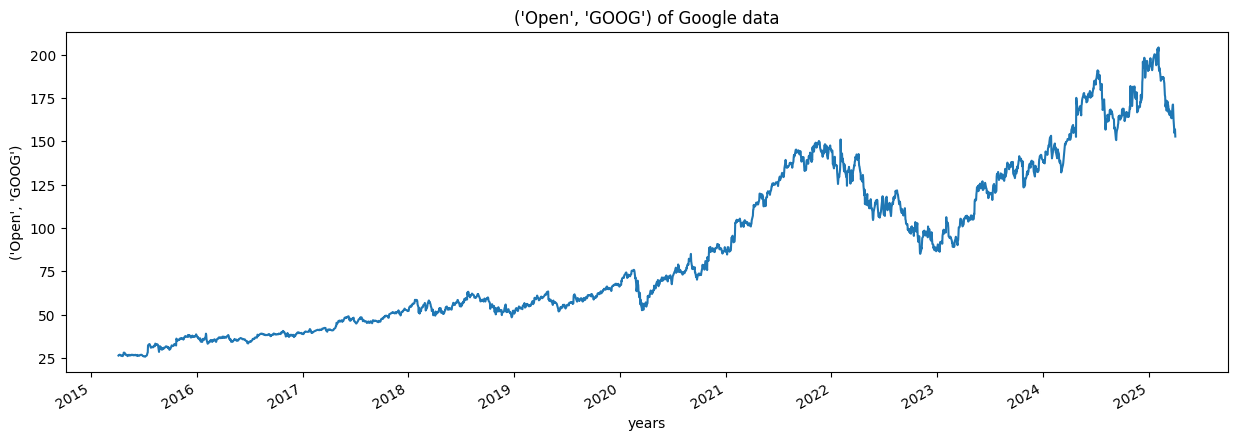

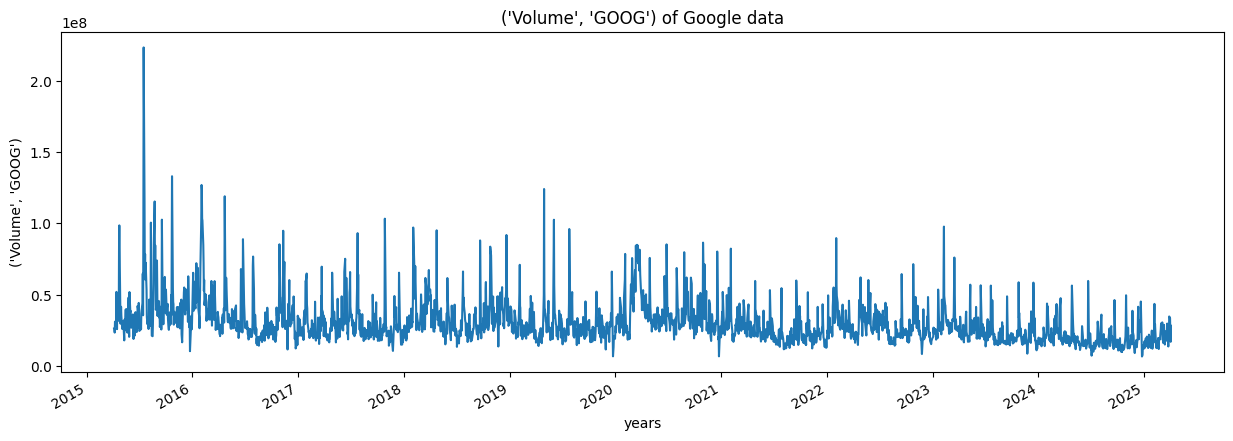

In [17]:
for column in google_data.columns:
    plotgraph((15,5), google_data[column],column)

In [18]:
import pandas as pd
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()

In [20]:
google_data['MA_for_100_days'][0:250].tail()

Date
2016-03-24    36.210018
2016-03-28    36.221325
2016-03-29    36.233099
2016-03-30    36.247217
2016-03-31    36.255597
Name: MA_for_100_days, dtype: float64

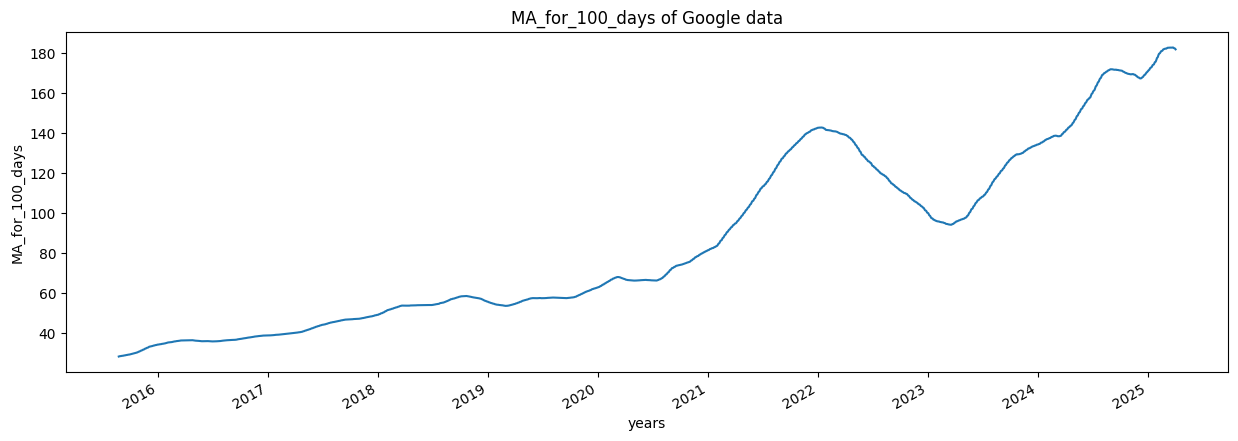

In [21]:
plotgraph((15,5), google_data['MA_for_100_days'],'MA_for_100_days')

In [22]:
google_data['percent_change_cp'] = google_data['Close'].pct_change()

In [23]:
google_data[['Close','percent_change_cp']].head()

Price,Close,percent_change_cp
Ticker,GOOG,
Date,,
2015-04-06,26.638596,NaN
2015-04-07,26.651247,0.000475
2015-04-08,26.879042,0.008547
2015-04-09,26.837852,-0.001532
2015-04-10,26.799637,-0.001424


In [24]:
Adj_close_price = google_data[['Close']]

In [25]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([207.47363281]), array([25.71967888]))

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaleddata= scaler.fit_transform(Adj_close_price)

In [27]:
xdata=[]
ydata=[]
for i in range(100, len(scaleddata)):
    xdata.append(scaleddata[i-100:i])
    ydata.append(scaleddata[i])
    
import numpy as np
xdata,ydata=np.array(xdata), np.array(ydata)

In [28]:
len(xdata)*0.7

1691.1999999999998

In [29]:
splittinglen=int(len(xdata)*0.7)
xtrain=xdata[:splittinglen]
ytrain=ydata[:splittinglen]
xtest=xdata[splittinglen:]
ytest=ydata[splittinglen:]

In [30]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1691, 100, 1)
(1691, 1)
(725, 100, 1)
(725, 1)


In [31]:
import keras

In [32]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(keras.layers.LSTM(64, return_sequences=False))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(1))

c:\Users\abhig\Documents\GitHub\StockPrice-Prediction\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
model.fit(xtrain,ytrain, batch_size=1, epochs=2)

Epoch 1/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - loss: 0.0015
Epoch 2/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - loss: 4.4153e-04


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [36]:
predictions = model.predict(xtest)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [37]:
invpredictions = scaler.inverse_transform(predictions)

In [38]:
inv_ytest = scaler.inverse_transform(ytest)

In [39]:
rmse = np.sqrt(np.mean((invpredictions - inv_ytest)**2))

In [40]:
ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_ytest.reshape(-1),
        'predictions': invpredictions.reshape(-1)
    }, index = google_data.index[splittinglen+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2022-05-13,115.966232,114.282913
2022-05-16,114.251350,115.051674
2022-05-17,116.151352,115.367340
2022-05-18,111.871132,116.055008
2022-05-19,110.223427,115.178131


<Figure size 1500x600 with 0 Axes>

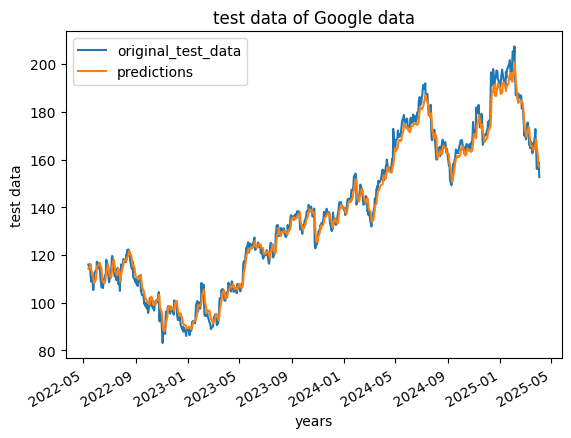

In [41]:
plotgraph((15,6),ploting_data,'test data')

<Figure size 1500x600 with 0 Axes>

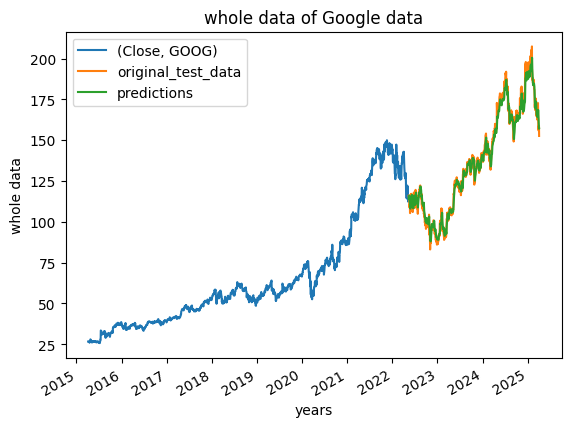

In [42]:
plotgraph((15,6),pd.concat([Adj_close_price[:splittinglen+100],ploting_data],axis=0),'whole data')

In [43]:
model.save("Latest_stockprice_model.keras")